<a href="https://colab.research.google.com/github/ashfaqfardin/Numerical-Method-Assignments/blob/main/1930087_Lab_7_Section_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Problem Statement:**
In this experiment we will do Ordinary least squares (multiple) regression for the prediction of Graduate Admissions from an Indian/Bangladeshi perspective. The dataset can be obtained from [Kaggle](https://www.kaggle.com/mohansacharya/graduate-admissions). The dataset (Admission_Predict.csv) containss even features arranged into columns in a CSV file. There are 400 sample datapoints. The features are as follows:
1. GRE Scores (out of 340)
2. TOEFL Scores (out of 120)
3. University Rating (out of 5)
4. Statement of Purpose and Letter of Recommendation Strength (out of 5)
5. Undergraduate GPA (out of 10)
6. Research Experience (either 0 or 1)
7. Chance of Admit (ranging from 0 to 1)

The first column of the dataset contains a serial number, and the final column provide the probability of getting admission, i.e. the target output for each datapoint.We will be using the dataset to create a linear regression model in order to determine the chances of admission of a new sample student, and to assess how well our model works in making a useful forecast.

#### **1. Import necessary packages:**

In [3]:
# Write appropriate code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### **2. Upload and load dataset:**
At first we have to upload the dataset to google colab to start working with it. Please download the **"Admission_Predict.csv"** dataset from [here](https://drive.google.com/file/d/1_DMXoBvuHZUpvBvCYtvMMdr5MDjbhTsu/view?usp=sharing). Then click on files form sidebar, drag and drop your file to side bar to upload the dataset.

Now, use `data = pd.read_csv("Admission_Predict.csv")` to load the data.

In [4]:
# Write appropriate code
data = pd.read_csv("Admission_Predict.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### **3. Preprocess the Data:**
* To visualize the loaded data use `print(data.head())`. 
* Now, after visualizing the data did you observe we have an extra column named `Serial No.`? 
* This certainly is not a feature, so we will drop this column. Use `data.drop('Serial No.', axis=1, inplace=True)` to drop the column.
* See the column `'Chance of Admit'` is also not a feature rather it is our target. 
  * We will store it in a seperate variable `y` using `y = data['Chance of Admit ']`.
  * Convert `y` to numpy array using `y = y.values`
  * Dorp the column from `data` using `data.drop('Chance of Admit ', axis=1, inplace=True)`
* In `data` we are left with all 7 features. Covert it to numpy array and store in a new variable `X` using `X = data.values`. So, `X` is the matrix of feature columns, each column in `X` will be the feature vectors.

☢ Note: Be careful about the space after the column name `'Chance of Admit '`.

In [5]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
# Write appropriate code
data.drop('Serial No.', axis = 1, inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
y = data['Chance of Admit ']
y = y.values
print(y.shape)

(400,)


In [8]:
data.drop('Chance of Admit ', axis = 1, inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [9]:
X = data.values
print(X.shape)

(400, 7)


#### **4. Add a ones column vector to X:**
Add a new column cosisting ones as $0^{th}$ column to X. Saw the [numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.c_.html) for more details. Devide data X and y into x_train, x_test, y_train and y_test. Train dataset will contains 300 datapoints and test dataset will contains 100 datapoint.

$f(x) =  [c_1  c_2 c_3] \times [1 x_1 x_2]$

In [10]:
# Write appropriate code
X = np.c_[np.ones((X.shape[0], 1)), X]
print(X.shape)
print(X)

(400, 8)
[[  1.   337.   118.   ...   4.5    9.65   1.  ]
 [  1.   324.   107.   ...   4.5    8.87   1.  ]
 [  1.   316.   104.   ...   3.5    8.     1.  ]
 ...
 [  1.   330.   116.   ...   4.5    9.45   1.  ]
 [  1.   312.   103.   ...   4.     8.78   0.  ]
 [  1.   333.   117.   ...   4.     9.66   1.  ]]


In [11]:
x_train = X[:300]
y_train = y[:300]

x_test = X[300:]
y_test = y[300:]

#### **5. Solve the system of equation:**
Solve the system of equations $(Xβ = y)$ to find the values of the $β$ vector $(β_0, β_1, β_2, \ldots, β_n)$. You can find $β$ using $β = X^† y = (X^T X)^{−1} X^T y = R^{−1} Q^T y$. There is also a numpy function to calculate the psuedo inverse: `np.linalg.pinv()`, saw the [numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html) for more details. Use `x_train` and `y_train` as dataset. 

In [12]:
# Write appropriate code
R = np.matmul(x_train.T, x_train)
R_inv = np.linalg.inv(R)
Q_T = x_train.T

beta = np.matmul(R_inv, Q_T).dot(y_train)
print(beta)

[-1.27488267  0.00176755  0.00290322  0.00771492 -0.00531496  0.02828439
  0.11736896  0.01922889]


#### **6. Find predicted chance of admit:**
Find the predicted chance of admit $\hat y$, by multiplying $X * β$. For prediction use `x_test` as dataset.

In [13]:
# Write appropriate code
y_hat = x_test.dot(beta)
print(x_test[-1], y_hat[-1], y_test[-1])

[  1.   333.   117.     4.     5.     4.     9.66   1.  ] 0.9238243503971058 0.95


#### **7. Find the error vector e:**
Find the error vector, $e$, by subtracting $\hat y$ from `y_test`.

In [14]:
# Write appropriate code
e = y_test - y_hat
print(e)

[ 0.0291627  -0.05766186 -0.04444189 -0.00295242 -0.01423397 -0.02456599
 -0.01355752 -0.02301928  0.0093059   0.00463892  0.01610232  0.004822
 -0.01524217  0.08948552  0.02410907  0.04437867  0.00838076  0.023962
  0.05143653  0.03255367  0.03908204  0.00718311  0.04330553  0.02406189
  0.03057463 -0.03777392  0.07567995  0.16899838  0.01988532 -0.06939951
  0.04378967  0.12201732  0.11465392 -0.02026922 -0.01178839 -0.01716884
  0.00209538  0.00134078  0.0249297   0.0327974   0.05853858  0.01838779
 -0.05643793 -0.02859978  0.01923137 -0.00654195 -0.03479051  0.00130943
  0.11908446  0.01005671  0.04609117 -0.05113857  0.0252894   0.04433086
  0.06818865  0.07999614  0.00420757  0.07982183  0.15962318  0.16903342
  0.05977317  0.03022282 -0.00504381  0.05678     0.01401787  0.03332566
  0.01742299  0.06197507  0.01253476  0.08469416  0.10793626  0.08207536
  0.01710383  0.06743465 -0.17011774 -0.15023548 -0.11955198 -0.00164999
  0.04913035  0.05982532  0.0093456  -0.00681752 -0.010

#### **8. Compute the $r^2$ value:**
Recall that, $r^2 = 1 - SSE / SST$, where $SSE$ is the sum of squared errors: $e^Te$ and $SST = \text{Total sum of squares : } (\text{y_test} - avg(\text{y_test}))^T(\text{y_test} - avg(\text{y_test}))$

In [15]:
# Write appropriate code
sse = e.T.dot(e)
sst = (y_test - np.average(y_test)).T.dot((y_test - np.average(y_test)))
r_squared  = 1 - sse/sst

print(r_squared)

0.8111013034092955


#### **9. Plot the vectors $y$, $\hat y$, and $e$:**
Plot the vectors $\text{y_test}$, $\hat y$, and $e$, and make suitable observations. Use different color for three vectors while ploting.

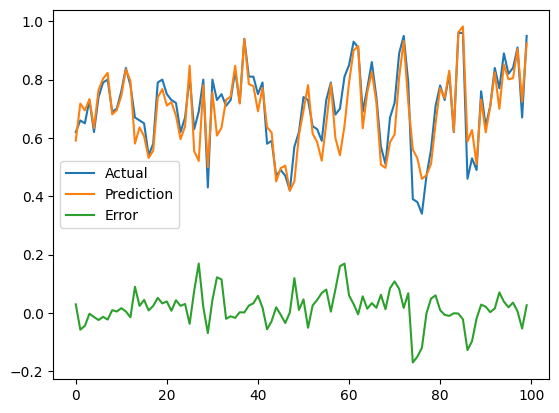

In [16]:
# Write appropriate code
plt.plot(y_test)
plt.plot(y_hat)
plt.plot(e)
plt.legend(["Actual", "Prediction", "Error"])
plt.show()

#### **10. Test with new data:**
Introduce a new sample student with your own data, and find where they fall.

In [17]:
[1]+[2, 10]

[1, 2, 10]

In [18]:
# Write appropriate code
# GRE Score	TOEFL Score	University Rating	SOP	LOR	CGPA	Research
def pred(a):
  return np.array([1]+a).dot(beta)

In [19]:
pred([320, 110, 3, 4.5, 4.5, 9.7, 1])*100

89.43031433183667